## Read the OSA data (without empty patients and chars in "peso")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix # import the scatter_matrix functionality
from sklearn import linear_model # import the linear models
from sklearn.metrics import mean_squared_error # import the scikit-learn function to compute error
from sklearn.metrics import r2_score # explained variance score
import seaborn as sns

In [2]:
data = pd.read_excel("OSA_DB_UPM.xlsx")
OSA_df = pd.DataFrame(data)

## Numerical matrices and vectors using numpy

In [3]:
columns = OSA_df.columns.tolist()
X = np.array(OSA_df[columns])

In [4]:
OSA_df.shape

(637, 7)

In [5]:
OSA_df[0:4]

,Patient,Gender,IAH,Weight,Height,Age,Cervical
0,P0002,hombre,29.6,119,174,56,48.0
1,P0004,hombre,19.7,78,168,39,42.0
2,P0005,hombre,9.0,80,173,32,40.0
3,P0006,hombre,2.0,109,190,32,42.0


In [6]:
X.shape

(637, 7)

In [7]:
X[0:4]

array([['P0002', 'hombre', 29.6, 119, 174, 56, 48.0],
       ['P0004', 'hombre', 19.7, 78, 168, 39, 42.0],
       ['P0005', 'hombre', 9.0, 80, 173, 32, 40.0],
       ['P0006', 'hombre', 2.0, 109, 190, 32, 42.0]], dtype=object)

In [8]:
X[0,2:4]

array([29.6, 119], dtype=object)

In [9]:
y = np.array(OSA_df['IAH'])

In [10]:
y[0:4]

array([29.6, 19.7,  9. ,  2. ])

## Pandas dataframes

In [11]:
OSA_df.head(5)

,Patient,Gender,IAH,Weight,Height,Age,Cervical
0,P0002,hombre,29.6,119,174,56,48.0
1,P0004,hombre,19.7,78,168,39,42.0
2,P0005,hombre,9.0,80,173,32,40.0
3,P0006,hombre,2.0,109,190,32,42.0
4,P0007,hombre,34.0,86,169,39,42.0


In [12]:
OSA_df.dtypes

Patient      object
Gender       object
IAH         float64
Weight        int64
Height        int64
Age           int64
Cervical    float64
dtype: object

In [13]:
OSA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Patient   637 non-null    object 
 1   Gender    637 non-null    object 
 2   IAH       637 non-null    float64
 3   Weight    637 non-null    int64  
 4   Height    637 non-null    int64  
 5   Age       637 non-null    int64  
 6   Cervical  637 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 35.0+ KB


In [14]:
OSA_df.iloc[0:4,]

,Patient,Gender,IAH,Weight,Height,Age,Cervical
0,P0002,hombre,29.6,119,174,56,48.0
1,P0004,hombre,19.7,78,168,39,42.0
2,P0005,hombre,9.0,80,173,32,40.0
3,P0006,hombre,2.0,109,190,32,42.0


In [15]:
OSA_df.set_index("Patient", inplace = True)

In [16]:
OSA_df.index

Index(['P0002', 'P0004', 'P0005', 'P0006', 'P0007', 'P0008', 'P0009', 'P0010',
       'P0013', 'P0014',
       ...
       'P0672', 'P0673', 'P0674', 'P0675', 'P0676', 'P0677', 'P0679', 'P0680',
       'P0682', 'P0683'],
      dtype='object', name='Patient', length=637)

In [17]:
OSA_df.loc[['P0002','P0006']]

,Gender,IAH,Weight,Height,Age,Cervical
Patient,,,,,,
P0002,hombre,29.6,119,174,56,48.0
P0006,hombre,2.0,109,190,32,42.0


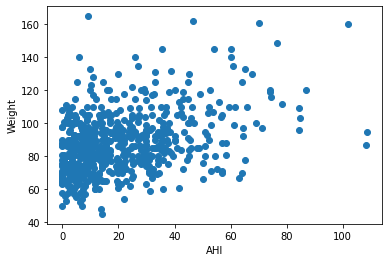

In [18]:
%matplotlib inline

plt.scatter(OSA_df['IAH'],OSA_df['Weight'])
plt.xlabel('AHI')
plt.ylabel('Weight')
plt.show()

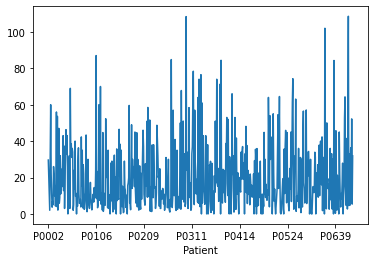

In [19]:
OSA_df['IAH'].plot()
plt.show()

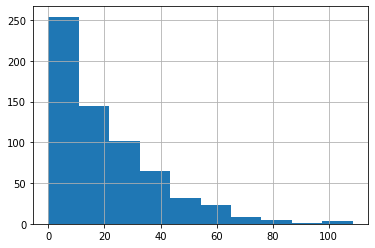

In [20]:
OSA_df['IAH'].hist()
plt.show()

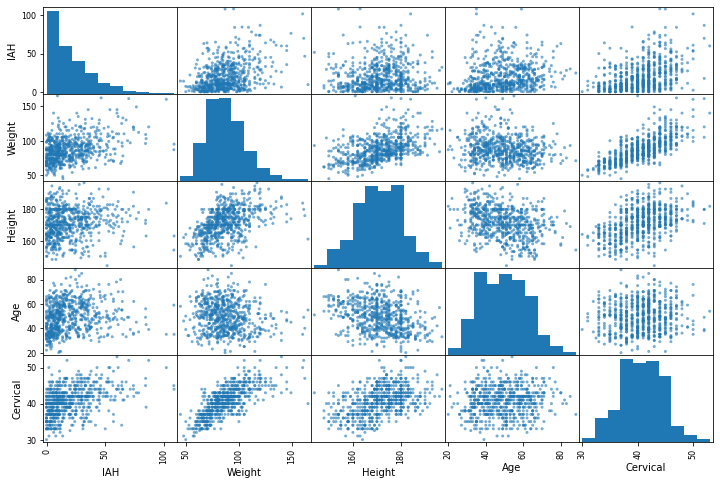

In [21]:
axes = scatter_matrix(OSA_df, alpha = 0.6, figsize = (12, 8), diagonal = 'hist')

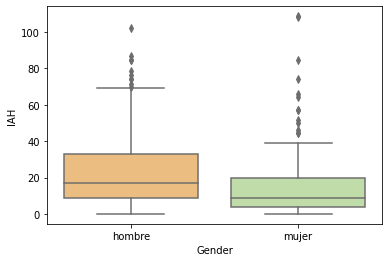

In [22]:
sns.boxplot(data = OSA_df, x = OSA_df['Gender'], y = OSA_df['IAH'], palette="Spectral")
plt.show()

## How many males and females have IAH > 30

In [23]:
result= OSA_df[OSA_df['IAH'] > 30].groupby('Gender').count()

print(result)

        IAH  Weight  Height  Age  Cervical
Gender                                    
hombre  126     126     126  126       126
mujer    28      28      28   28        28


In [24]:
result= OSA_df.groupby('Gender')['IAH'].mean()

print(result)

Gender
hombre    22.526945
mujer     15.057143
Name: IAH, dtype: float64
